## (a)

\begin{align*}
H_{ij} = \frac{\partial J}{\partial \theta_i \partial \theta_j} 
&= \frac{1}{m} \sum_{k=1}^{m} \frac{\partial (g(z)  - 1)}{\partial \theta_j} y^{(k)} x_i^{(k)} \\
&= \frac{1}{m} \sum_{k=1}^{m} \frac {\partial g(z)}{\partial \theta_j} y^{(k)} x_i^{(k)} \\
&= \frac{1}{m} \sum_{k=1}^{m} g(z)(1 - g(z)) \frac{\partial z}{\partial \theta_j} y^{(k)} x_i^{(k)} \\
&= \frac{1}{m} \sum_{k=1}^{m} g(z)(1 - g(z)) y^{(k)} x_j^{(k)} y^{(k)} x_i^{(k)} \\
&= \frac{1}{m} \sum_{k=1}^{m} g(z)(1 - g(z)) x_i^{(k)} x_j^{(k)} \\
\end{align*}

## (b)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [43]:
X = pd.read_csv('http://cs229.stanford.edu/ps/ps1/logistic_x.txt',header=None,delim_whitespace=True,dtype=np.float32)
y = pd.read_csv('http://cs229.stanford.edu/ps/ps1/logistic_y.txt',header=None,delim_whitespace=True,dtype=np.int32)
print(X.shape, y.shape)

(99, 2) (99, 1)


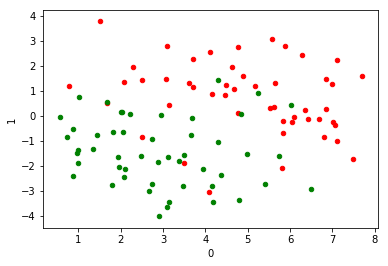

In [44]:
ax = plt.axes()
X.loc[y_train[0]==1].plot.scatter(0,1,c='red',ax=ax)
X.loc[y_train[0]==-1].plot.scatter(0,1,c='green',ax=ax)

In [59]:
X_train = X.values
y_train = y.values.reshape(-1)

In [60]:
# add intercept term placeholder
X_train = np.concatenate([X_train,np.ones((X_train.shape[0],1))],axis=1)

In [71]:
np.mean(g * (1-g) * X_train[:,i] * X_train[:,j])

0.0

In [76]:
step_cnt

3

In [94]:
tol = 1e9
threshold = 1e-6
n_samples, n_features = X_train.shape
print(n_samples, n_features)
# feature vector's size
theta = np.zeros(n_features)
theta_history = []
step_cnt = 0
while tol > threshold:
    # 计算Logistic regression
    z = y_train * X_train.dot(theta)
    g = 1 / (1 + np.exp(-z))
    # 计算Loss的梯度
    loss_delta = np.mean((g - 1) * y_train * X_train.T, axis=1)

    hessian = np.zeros((n_features,n_features))
    for i in range(n_features):
        for j in range(n_features):
            if i <= j :
                hessian[i,j] = np.mean(g * (1-g) * X_train[:,i] * X_train[:,j])
                if i != j:
                    hessian[j,i] = hessian[i,j]
    
    p = - np.linalg.inv(hessian).dot(loss_delta)
    old_theta = theta.copy()
    theta += p
    
    theta_history.append(theta)
    step_cnt += 1
    tol = np.sum(np.abs(theta - old_theta))
print('converged after {0} iterations'.format(step_cnt))

99 3
converged after 7 iterations


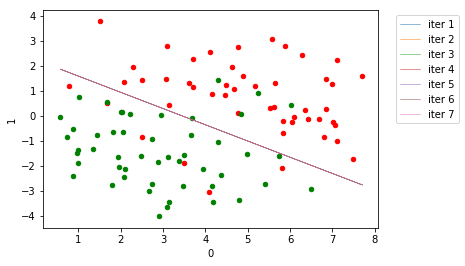

In [98]:
ax = plt.axes()
X.loc[y_train==1].plot.scatter(0,1,c='red',ax=ax)
X.loc[y_train==-1].plot.scatter(0,1,c='green',ax=ax)

_xs = np.array([np.min(X_train[:,0]), np.max(X_train[:,0])])
for k, theta in enumerate(theta_history):
    _ys = (theta[2] + theta[0] * _xs) / (- theta[1])
    plt.plot(_xs, _ys, label='iter {0}'.format(k + 1), lw=0.5)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

In [83]:
_xs

array([-4.00650358,  3.8128655 ])